In [5]:
##特征分析

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# 导入数据集
boston = fetch_openml(name="boston", version=1, as_frame=True, parser="pandas")
X, y = boston.data, boston.target

# Xgboost训练过程
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,objective='reg:gamma')
'''
XGBRegressor：XGBoost的回归模型。
max_depth=5：树的最大深度。
learning_rate=0.1：学习率，控制每棵树对最终结果的贡献。
n_estimators=160：树的个数。
silent=True：静默模式，不输出训练过程中的信息。
objective='reg:gamma'：目标函数，这里使用的是伽马回归，适用于目标变量为正数且分布不均匀的情况。
'''
model.fit(X_train,y_train)

# 对测试集进行预测
ans = model.predict(X_test)

# 显示重要特征
plot_importance(model)
plt.show()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CHAS: category, RAD: category

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


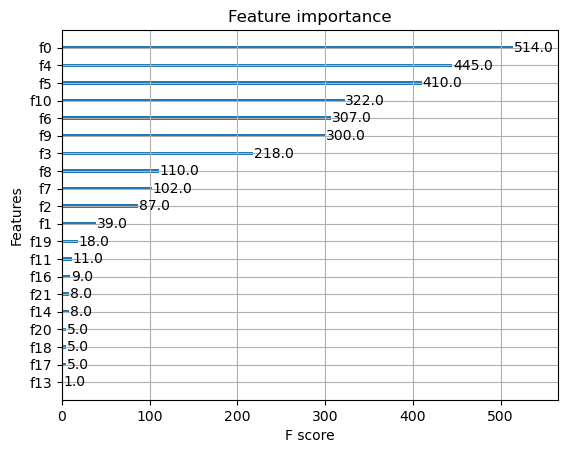

In [6]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 导入数据集
boston = fetch_openml(name="boston", version=1, as_frame=True, parser="pandas")
X, y = boston.data, boston.target

# 检查数据类型
print(X.dtypes)

# 确定数值型和分类型特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
'''
X: 这是一个Pandas DataFrame，代表你的数据集。
select_dtypes(): 这是Pandas库中的一个方法，用于根据数据类型选择数据集中的列。
include=['int64', 'float64']: 这个参数指定了你想要选择的数据类型。在这里，int64 和 float64 分别代表64位整数和64位浮点数，这是数值型数据的两种常见类型。
.columns: 这会从筛选后的数据集中提取列名，即特征名
'''
categorical_features = X.select_dtypes(include=['object', 'category']).columns
# object 通常用于表示字符串或混合类型（数值和字符串），而 category 表示分类数据

# 创建预处理管道
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 创建完整的管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, objective='reg:gamma'))
])

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
pipeline.fit(X_train, y_train)

# 对测试集进行预测
ans = pipeline.predict(X_test)

# 显示重要特征
plot_importance(pipeline.named_steps['model'])
plt.show()